In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

In [3]:
# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano model (Fast & Lightweight)

# Vehicle classes to detect
vehicle_classes = ['car', 'truck', 'bus', 'bicycle', 'motorcycle']

In [4]:
# Dictionary to store vehicle counts for each lane
lane_vehicle_counts = {}

def calculate_signal_time(vehicle_count):
    if vehicle_count <= 5:
        time = 10  # Minimum signal time for <= 5 vehicles
    elif 6 <= vehicle_count <= 25:
        time = 10 + (vehicle_count - 5) * 2  # Linear adjustment between 10 and 50
    elif vehicle_count > 25:
        time = 50 + (vehicle_count - 25) * 0.8  # Increase from 50 up to max 70
    else:
        time = 50  # Default signal time for 25 vehicles
    
    return max(10, min(time, 70))  # Ensure time is between 10 and 70 seconds


image 1/1 C:\Users\chand\Desktop\Traffic Automation\1\lane2.jpg: 384x640 2 persons, 18 cars, 3 motorcycles, 3 buss, 111.3ms
Speed: 8.2ms preprocess, 111.3ms inference, 11.2ms postprocess per image at shape (1, 3, 384, 640)
Lane 1 Vehicles: 24, Signal Time: 48 seconds


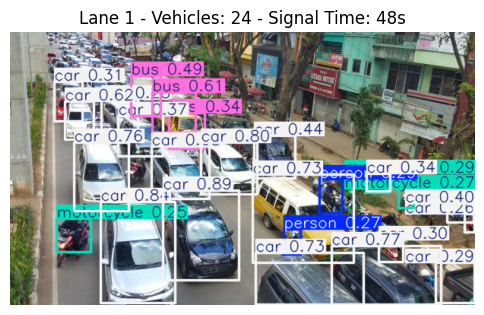

In [5]:
# Function to upload images and perform detection
def upload_and_detect(lane_num):
    file_path = filedialog.askopenfilename(title=f"Select Image for Lane {lane_num}", filetypes=[("Image Files", "*.jpg;*.png;*.jpeg;*.webp;*.avif")])
    if not file_path:
        print(f"No image selected for Lane {lane_num}")
        return
    
    im = cv2.imread(file_path)
    if im is None:
        print(f"Image not loaded for Lane {lane_num}. Check the file path.")
        return
    
    # Perform detection
    results = model(file_path)
    result_image = results[0].plot()  # Plot detection results on the image
    
    # Counting Vehicles
    vehicle_count = 0
    for result in results:
        for box in result.boxes:
            cls = model.names[int(box.cls)]  # Class name
            if cls in vehicle_classes:
                vehicle_count += 1
    
    lane_vehicle_counts[f'Lane{lane_num}'] = vehicle_count
    signal_time = calculate_signal_time(vehicle_count)
    print(f"Lane {lane_num} Vehicles: {vehicle_count}, Signal Time: {signal_time} seconds")
    
    # Display Result Image with Matplotlib (Smaller Size)
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Lane {lane_num} - Vehicles: {vehicle_count} - Signal Time: {signal_time}s")
    plt.axis('off')
    plt.show()

# Create GUI window
root = tk.Tk()
root.title("Traffic Vehicle Detection")
root.geometry("400x300")

# Buttons to Upload Images for Each Lane
for i in range(1, 5):
    btn = tk.Button(root, text=f"Upload Image for Lane {i}", command=lambda i=i: upload_and_detect(i))
    btn.pack(pady=10)

root.mainloop()

In [9]:


# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano model (Fast & Lightweight)

# Vehicle classes to detect
vehicle_classes = ['car', 'truck', 'bus', 'bicycle', 'motorcycle']

def calculate_signal_time(vehicle_count):
    if vehicle_count <= 5:
        time = 10  # Minimum signal time for <= 5 vehicles
    elif 6 <= vehicle_count <= 25:
        time = 10 + (vehicle_count - 5) * 2  # Linear adjustment between 10 and 50
    elif vehicle_count > 25:
        time = 50 + (vehicle_count - 25) * 0.8  # Increase from 50 up to max 70
    else:
        time = 50  # Default signal time for 25 vehicles
    
    return max(10, min(time, 70))  # Ensure time is between 10 and 70 seconds

def process_video(video_source):
    cap = cv2.VideoCapture(video_source)
    if not cap.isOpened():
        print(f"Error: Could not open video source {video_source}")
        return
    
    total_vehicle_count = 0  # Track total vehicles passed
    
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Processing complete.")
            break
        
        # Perform detection
        results = model(frame)
        result_frame = results[0].plot()  # Plot detection results on the frame
        
        # Counting Vehicles
        frame_vehicle_count = 0
        for result in results:
            for box in result.boxes:
                cls = model.names[int(box.cls)]  # Class name
                if cls in vehicle_classes:
                    frame_vehicle_count += 1
        
        total_vehicle_count += frame_vehicle_count
        
        # Display vehicle count on the frame
        cv2.putText(result_frame, f"Frame Vehicles: {frame_vehicle_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(result_frame, f"Total Vehicles: {total_vehicle_count}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Display the result frame
        cv2.imshow("Traffic Vehicle Detection", result_frame)
        
        # Exit on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Calculate final signal timing
    final_signal_time = calculate_signal_time(total_vehicle_count)
    print(f"Total Vehicles Passed: {total_vehicle_count}")
    print(f"Predicted Signal Time: {final_signal_time} seconds")
    
    # Release resources
    cap.release()
    cv2.destroyAllWindows()

def start_real_time_processing():
    video_source = 0  # Use 0 for webcam or provide a video file path
    process_video(video_source)

def upload_and_process_video():
    file_path = filedialog.askopenfilename(title="Select Video File", filetypes=[("Video Files", "*.mp4;*.avi;*.mov")])
    if not file_path:
        print("No video file selected")
        return
    process_video(file_path)

# Create GUI window
root = tk.Tk()
root.title("Traffic Vehicle Detection")
root.geometry("400x200")

# Button for real-time webcam processing
btn_webcam = tk.Button(root, text="Start Real-Time Webcam Processing", command=start_real_time_processing)
btn_webcam.pack(pady=10)

# Button for uploading and processing a video file
btn_upload = tk.Button(root, text="Upload and Process Video File", command=upload_and_process_video)
btn_upload.pack(pady=10)

root.mainloop()



0: 384x640 6 cars, 73.9ms
Speed: 4.0ms preprocess, 73.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 69.7ms
Speed: 2.6ms preprocess, 69.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 1 bus, 77.3ms
Speed: 3.5ms preprocess, 77.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 5 cars, 1 truck, 63.3ms
Speed: 2.8ms preprocess, 63.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 6 cars, 1 truck, 70.1ms
Speed: 2.7ms preprocess, 70.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 5 cars, 1 truck, 81.8ms
Speed: 3.3ms preprocess, 81.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 1 bus, 1 traffic light, 80.1ms
Speed: 3.1ms preprocess, 80.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 4 cars, 1 b

In [16]:


# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano model (Fast & Lightweight)

# Vehicle classes to detect
vehicle_classes = ['car', 'truck', 'bus', 'bicycle', 'motorcycle']

class VideoProcessor:
    def __init__(self):
        self.cap = None
        self.processing = False
        self.current_signal_time = 10  # Default minimum signal time
        self.frame_count = 0

    def calculate_signal_time(self, frame_vehicle_count):
        """Calculate signal time based only on the current frame's vehicle count"""
        if frame_vehicle_count <= 5:
            time = 10  # Minimum signal time for <= 5 vehicles
        elif 6 <= frame_vehicle_count <= 25:
            time = 10 + (frame_vehicle_count - 5) * 2  # Linear adjustment between 10 and 50
        elif frame_vehicle_count > 25:
            time = 50 + (frame_vehicle_count - 25) * 0.8  # Increase from 50 up to max 70
        else:
            time = 50  # Default signal time for 25 vehicles
        
        return max(10, min(time, 70))  # Ensure time is between 10 and 70 seconds

    def process_video(self, video_source):
        self.cap = cv2.VideoCapture(video_source)
        if not self.cap.isOpened():
            print(f"Error: Could not open video source {video_source}")
            return
        
        self.processing = True
        self.frame_count = 0
        
        while self.processing:
            ret, frame = self.cap.read()
            if not ret:
                print("Processing complete.")
                break
            
            self.frame_count += 1
            
            # Perform detection
            results = model(frame)
            result_frame = results[0].plot()  # Plot detection results on the frame
            
            # Counting Vehicles in current frame
            frame_vehicle_count = 0
            for result in results:
                for box in result.boxes:
                    cls = model.names[int(box.cls)]  # Class name
                    if cls in vehicle_classes:
                        frame_vehicle_count += 1
            
            # Calculate signal time based only on current frame's vehicle count
            self.current_signal_time = self.calculate_signal_time(frame_vehicle_count)
            
            # Display information on the frame
            cv2.putText(result_frame, f"Frame Vehicles: {frame_vehicle_count}", (10, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.putText(result_frame, f"Signal Time: {self.current_signal_time:.1f}s", (10, 70), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
            cv2.putText(result_frame, "Press 'q' to stop", (10, 110), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            
            # Display the result frame
            cv2.imshow("Traffic Vehicle Detection", result_frame)
            
            # Exit on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                self.stop_processing()
                break
        
        # Print final results when processing stops
        print(f"\nProcessing stopped after {self.frame_count} frames")
        print(f"Final Signal Time Prediction: {self.current_signal_time:.1f} seconds")
        
        # Release resources
        self.cleanup()

    def stop_processing(self):
        self.processing = False

    def cleanup(self):
        if self.cap is not None:
            self.cap.release()
        cv2.destroyAllWindows()

def start_real_time_processing():
    processor = VideoProcessor()
    video_source = 0  # Use 0 for webcam
    processor.process_video(video_source)

def upload_and_process_video():
    file_path = filedialog.askopenfilename(
        title="Select Video File", 
        filetypes=[("Video Files", "*.mp4;*.avi;*.mov")]
    )
    if not file_path:
        print("No video file selected")
        return
    
    processor = VideoProcessor()
    processor.process_video(file_path)

# Create GUI window
root = tk.Tk()
root.title("Traffic Vehicle Detection")
root.geometry("400x200")

# Button for real-time webcam processing
btn_webcam = tk.Button(
    root, 
    text="Start Real-Time Webcam Processing", 
    command=start_real_time_processing
)
btn_webcam.pack(pady=10)

# Button for uploading and processing a video file
btn_upload = tk.Button(
    root, 
    text="Upload and Process Video File", 
    command=upload_and_process_video
)
btn_upload.pack(pady=10)

root.mainloop()

No video file selected


In [12]:


# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano model (Fast & Lightweight)

# Vehicle classes to detect
vehicle_classes = ['car', 'truck', 'bus', 'bicycle', 'motorcycle']

class VideoProcessor:
    def __init__(self):
        self.cap = None
        self.processing = False
        self.current_signal_time = 10  # Default minimum signal time
        self.last_frame_details = {
            'frame_number': 0,
            'vehicle_count': 0,
            'signal_time': 10
        }

    def calculate_signal_time(self, frame_vehicle_count):
        """Calculate signal time based only on the current frame's vehicle count"""
        if frame_vehicle_count <= 5:
            time = 10  # Minimum signal time for <= 5 vehicles
        elif 6 <= frame_vehicle_count <= 25:
            time = 10 + (frame_vehicle_count - 5) * 2  # Linear adjustment between 10 and 50
        elif frame_vehicle_count > 25:
            time = 50 + (frame_vehicle_count - 25) * 0.8  # Increase from 50 up to max 70
        else:
            time = 50  # Default signal time for 25 vehicles
        
        return max(10, min(time, 70))  # Ensure time is between 10 and 70 seconds

    def process_video(self, video_source):
        self.cap = cv2.VideoCapture(video_source)
        if not self.cap.isOpened():
            print(f"Error: Could not open video source {video_source}")
            return
        
        self.processing = True
        frame_number = 0
        
        while self.processing:
            ret, frame = self.cap.read()
            if not ret:
                print("Reached end of video.")
                break
            
            frame_number += 1
            
            # Perform detection
            results = model(frame)
            result_frame = results[0].plot()  # Plot detection results on the frame
            
            # Counting Vehicles in current frame
            frame_vehicle_count = 0
            for result in results:
                for box in result.boxes:
                    cls = model.names[int(box.cls)]  # Class name
                    if cls in vehicle_classes:
                        frame_vehicle_count += 1
            
            # Calculate signal time based only on current frame's vehicle count
            current_signal_time = self.calculate_signal_time(frame_vehicle_count)
            
            # Update last frame details
            self.last_frame_details = {
                'frame_number': frame_number,
                'vehicle_count': frame_vehicle_count,
                'signal_time': current_signal_time
            }
            
            # Display information on the frame
            cv2.putText(result_frame, f"Frame: {frame_number}", (10, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.putText(result_frame, f"Vehicles: {frame_vehicle_count}", (10, 70), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.putText(result_frame, f"Signal Time: {current_signal_time:.1f}s", (10, 110), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
            cv2.putText(result_frame, "Press 'q' to stop", (10, 150), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            
            # Display the result frame
            cv2.imshow("Traffic Vehicle Detection", result_frame)
            
            # Exit on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                self.stop_processing()
                break
        
        # Print last frame details when processing stops
        self.print_last_frame_details()
        
        # Release resources
        self.cleanup()

    def print_last_frame_details(self):
        print("\nLast Frame Details:")
        print(f"Frame Number: {self.last_frame_details['frame_number']}")
        print(f"Vehicle Count: {self.last_frame_details['vehicle_count']}")
        print(f"Calculated Signal Time: {self.last_frame_details['signal_time']:.1f} seconds")

    def stop_processing(self):
        self.processing = False

    def cleanup(self):
        if self.cap is not None:
            self.cap.release()
        cv2.destroyAllWindows()

def start_real_time_processing():
    processor = VideoProcessor()
    video_source = 0  # Use 0 for webcam
    processor.process_video(video_source)

def upload_and_process_video():
    file_path = filedialog.askopenfilename(
        title="Select Video File", 
        filetypes=[("Video Files", "*.mp4;*.avi;*.mov")]
    )
    if not file_path:
        print("No video file selected")
        return
    
    processor = VideoProcessor()
    processor.process_video(file_path)

# Create GUI window
root = tk.Tk()
root.title("Traffic Vehicle Detection")
root.geometry("400x200")

# Button for real-time webcam processing
btn_webcam = tk.Button(
    root, 
    text="Start Real-Time Webcam Processing", 
    command=start_real_time_processing
)
btn_webcam.pack(pady=10)

# Button for uploading and processing a video file
btn_upload = tk.Button(
    root, 
    text="Upload and Process Video File", 
    command=upload_and_process_video
)
btn_upload.pack(pady=10)

root.mainloop()


0: 480x640 (no detections), 83.3ms
Speed: 5.0ms preprocess, 83.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 73.9ms
Speed: 2.1ms preprocess, 73.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 72.8ms
Speed: 1.8ms preprocess, 72.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 71.1ms
Speed: 1.6ms preprocess, 71.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 66.9ms
Speed: 1.3ms preprocess, 66.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 66.7ms
Speed: 1.5ms preprocess, 66.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 69.7ms
Speed: 2.6ms preprocess, 69.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 72.4ms
Speed: 1.6ms preprocess, 72.4ms i

In [ ]:

import time
import threading
import socket
import json

# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano model

# Vehicle classes to detect
vehicle_classes = ['car', 'truck', 'bus', 'bicycle', 'motorcycle']

class TrafficSignalController:
    def __init__(self, signal_id):
        self.signal_id = signal_id
        self.current_signal_time = 10
        self.max_time = 70
        self.min_time = 10
        self.neighbor_signals = {}
        self.communication_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
        self.communication_socket.bind(('localhost', 5000 + signal_id))
        self.receive_thread = threading.Thread(target=self.receive_updates)
        self.receive_thread.daemon = True
        self.receive_thread.start()

    def calculate_signal_time(self, frame_vehicle_count):
        """Calculate signal time with consideration for neighboring signals"""
        base_time = min(10 + frame_vehicle_count * 2, self.max_time)
        
        # Adjust based on neighboring signals' status
        neighbor_adjustment = 0
        for signal_id, data in self.neighbor_signals.items():
            if data['congestion'] == 'high' and data['direction'] == 'incoming':
                neighbor_adjustment += 5  # Increase time if neighbors are congested
            elif data['congestion'] == 'low' and data['direction'] == 'outgoing':
                neighbor_adjustment -= 2  # Decrease time if outgoing routes are clear
        
        final_time = max(self.min_time, min(base_time + neighbor_adjustment, self.max_time))
        return final_time

    def update_neighbor_status(self, signal_id, congestion, direction):
        """Update status of neighboring signals"""
        self.neighbor_signals[signal_id] = {
            'congestion': congestion,
            'direction': direction,
            'last_update': time.time()
        }

    def send_update(self, target_signal_id, congestion, direction):
        """Send status update to neighboring signal"""
        message = json.dumps({
            'sender_id': self.signal_id,
            'congestion': congestion,
            'direction': direction
        })
        self.communication_socket.sendto(message.encode(), ('localhost', 5000 + target_signal_id))

    def receive_updates(self):
        """Thread to receive updates from neighboring signals"""
        while True:
            data, addr = self.communication_socket.recvfrom(1024)
            message = json.loads(data.decode())
            self.update_neighbor_status(
                message['sender_id'],
                message['congestion'],
                message['direction']
            )

class VideoProcessor:
    def __init__(self, signal_id):
        self.cap = None
        self.processing = False
        self.signal_controller = TrafficSignalController(signal_id)
        self.last_frame_details = {
            'frame_number': 0,
            'vehicle_count': 0,
            'signal_time': 10,
            'congestion_level': 'low'
        }
        self.congestion_thresholds = {
            'low': 10,
            'medium': 25,
            'high': 40
        }

    def get_congestion_level(self, count):
        if count < self.congestion_thresholds['low']:
            return 'low'
        elif count < self.congestion_thresholds['medium']:
            return 'medium'
        else:
            return 'high'

    def process_video(self, video_source, neighbor_ids=None):
        if neighbor_ids:
            for neighbor_id in neighbor_ids:
                self.signal_controller.neighbor_signals[neighbor_id] = {
                    'congestion': 'unknown',
                    'direction': 'unknown',
                    'last_update': 0
                }
        
        self.cap = cv2.VideoCapture(video_source)
        if not self.cap.isOpened():
            print(f"Error: Could not open video source {video_source}")
            return
        
        self.processing = True
        frame_number = 0
        
        while self.processing:
            ret, frame = self.cap.read()
            if not ret:
                print("Reached end of video.")
                break
            
            frame_number += 1
            
            # Perform detection
            results = model(frame)
            result_frame = results[0].plot()
            
            # Count vehicles in current frame
            frame_vehicle_count = 0
            for result in results:
                for box in result.boxes:
                    cls = model.names[int(box.cls)]
                    if cls in vehicle_classes:
                        frame_vehicle_count += 1
            
            # Determine congestion level
            congestion_level = self.get_congestion_level(frame_vehicle_count)
            
            # Calculate signal time with traffic management logic
            current_signal_time = self.signal_controller.calculate_signal_time(frame_vehicle_count)
            
            # Update last frame details
            self.last_frame_details = {
                'frame_number': frame_number,
                'vehicle_count': frame_vehicle_count,
                'signal_time': current_signal_time,
                'congestion_level': congestion_level
            }
            
            # Send updates to neighboring signals
            for neighbor_id in self.signal_controller.neighbor_signals.keys():
                self.signal_controller.send_update(
                    neighbor_id,
                    congestion_level,
                    'outgoing'  # Assuming this signal is sending traffic to neighbors
                )
            
            # Display information
            self.display_info(result_frame, frame_number, frame_vehicle_count, current_signal_time, congestion_level)
            
            # Show the result frame
            cv2.imshow(f"Signal {self.signal_controller.signal_id} - Traffic Detection", result_frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                self.stop_processing()
                break
        
        self.print_last_frame_details()
        self.cleanup()

    def display_info(self, frame, frame_num, vehicle_count, signal_time, congestion):
        cv2.putText(frame, f"Frame: {frame_num}", (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, f"Vehicles: {vehicle_count}", (10, 70), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, f"Signal Time: {signal_time:.1f}s", (10, 110), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        cv2.putText(frame, f"Congestion: {congestion}", (10, 150), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255) if congestion == 'high' else (0, 255, 0), 2)
        cv2.putText(frame, "Press 'q' to stop", (10, 190), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    def print_last_frame_details(self):
        print("\n=== Last Frame Analysis ===")
        print(f"Signal ID: {self.signal_controller.signal_id}")
        print(f"Frame Number: {self.last_frame_details['frame_number']}")
        print(f"Vehicle Count: {self.last_frame_details['vehicle_count']}")
        print(f"Congestion Level: {self.last_frame_details['congestion_level']}")
        print(f"Calculated Signal Time: {self.last_frame_details['signal_time']:.1f} seconds")
        
        print("\nNeighboring Signals Status:")
        for signal_id, data in self.signal_controller.neighbor_signals.items():
            print(f"Signal {signal_id}: {data['congestion']} congestion ({data['direction']})")

    def stop_processing(self):
        self.processing = False

    def cleanup(self):
        if self.cap is not None:
            self.cap.release()
        cv2.destroyAllWindows()

def start_signal_system():
    signal_id = int(input("Enter this signal's ID (1-10): "))
    neighbor_ids = list(map(int, input("Enter neighbor signal IDs (comma separated): ").split(',')))
    
    root = tk.Tk()
    root.title(f"Traffic Signal Controller - Signal {signal_id}")
    root.geometry("400x200")
    
    processor = VideoProcessor(signal_id)
    
    def start_webcam():
        processor.process_video(0, neighbor_ids)
    
    def start_video_file():
        file_path = filedialog.askopenfilename(
            title="Select Video File", 
            filetypes=[("Video Files", "*.mp4;*.avi;*.mov")]
        )
        if file_path:
            processor.process_video(file_path, neighbor_ids)
    
    tk.Label(root, text=f"Signal Controller {signal_id}", font=('Arial', 14)).pack(pady=10)
    tk.Button(root, text="Start Webcam Processing", command=start_webcam).pack(pady=5)
    tk.Button(root, text="Process Video File", command=start_video_file).pack(pady=5)
    
    root.mainloop()

if __name__ == "__main__":
    start_signal_system()

In [2]:

import time
import threading
import socket
import json
from queue import Queue

# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano model

# Vehicle classes to detect
vehicle_classes = ['car', 'truck', 'bus', 'bicycle', 'motorcycle']

class TrafficSignalController:
    def __init__(self, signal_id):
        self.signal_id = signal_id
        self.current_signal_time = 10
        self.max_time = 70
        self.min_time = 10
        self.neighbor_signals = {}  # {signal_id: {'congestion': 'low', 'direction': 'outgoing', 'last_update': timestamp}}
        self.message_queue = Queue()
        
        # Setup UDP communication
        self.communication_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
        self.communication_socket.settimeout(0.1)  # Non-blocking with timeout
        self.communication_socket.bind(('localhost', 5000 + signal_id))
        
        # Start receiver thread
        self.receive_thread = threading.Thread(target=self.receive_updates)
        self.receive_thread.daemon = True
        self.receive_thread.start()
        
        # Start processor thread
        self.process_thread = threading.Thread(target=self.process_messages)
        self.process_thread.daemon = True
        self.process_thread.start()

    def calculate_signal_time(self, frame_vehicle_count):
        """Calculate signal time with consideration for neighboring signals"""
        # Base calculation
        if frame_vehicle_count <= 5:
            base_time = 10
        elif 6 <= frame_vehicle_count <= 25:
            base_time = 10 + (frame_vehicle_count - 5) * 2
        else:
            base_time = 50 + (frame_vehicle_count - 25) * 0.8
        
        # Adjust based on neighboring signals' status
        neighbor_adjustment = 0
        current_time = time.time()
        
        for signal_id, data in list(self.neighbor_signals.items()):
            # Remove stale entries (older than 5 seconds)
            if current_time - data['last_update'] > 5:
                self.neighbor_signals.pop(signal_id, None)
                continue
                
            if data['congestion'] == 'high' and data['direction'] == 'incoming':
                neighbor_adjustment += 5  # Increase time if neighbors are congested
            elif data['congestion'] == 'low' and data['direction'] == 'outgoing':
                neighbor_adjustment -= 2  # Decrease time if outgoing routes are clear
        
        final_time = max(self.min_time, min(base_time + neighbor_adjustment, self.max_time))
        return final_time

    def update_neighbor_status(self, signal_id, congestion, direction):
        """Update status of neighboring signals"""
        self.neighbor_signals[signal_id] = {
            'congestion': congestion,
            'direction': direction,
            'last_update': time.time()
        }

    def send_update(self, congestion, direction):
        """Send status update to all neighboring signals"""
        message = json.dumps({
            'sender_id': self.signal_id,
            'congestion': congestion,
            'direction': direction,
            'timestamp': time.time()
        })
        
        for neighbor_id in self.neighbor_signals.keys():
            try:
                self.communication_socket.sendto(message.encode(), ('localhost', 5000 + neighbor_id))
            except Exception as e:
                print(f"Error sending to signal {neighbor_id}: {e}")

    def receive_updates(self):
        """Thread to continuously receive updates from neighboring signals"""
        while True:
            try:
                data, addr = self.communication_socket.recvfrom(1024)
                self.message_queue.put(data)
            except socket.timeout:
                continue
            except Exception as e:
                print(f"Receive error: {e}")
                time.sleep(1)

    def process_messages(self):
        """Thread to process received messages"""
        while True:
            if not self.message_queue.empty():
                try:
                    data = self.message_queue.get()
                    message = json.loads(data.decode())
                    self.update_neighbor_status(
                        message['sender_id'],
                        message['congestion'],
                        message['direction']
                    )
                except Exception as e:
                    print(f"Error processing message: {e}")
            time.sleep(0.1)

class VideoProcessor:
    def __init__(self, signal_id):
        self.cap = None
        self.processing = False
        self.signal_controller = TrafficSignalController(signal_id)
        self.last_frame_details = {
            'frame_number': 0,
            'vehicle_count': 0,
            'signal_time': 10,
            'congestion_level': 'low'
        }
        self.congestion_thresholds = {
            'low': 10,
            'medium': 25,
            'high': 40
        }
        self.direction = 'outgoing'  # Default direction this signal sends traffic

    def get_congestion_level(self, count):
        if count < self.congestion_thresholds['low']:
            return 'low'
        elif count < self.congestion_thresholds['medium']:
            return 'medium'
        else:
            return 'high'

    def process_video(self, video_source, neighbor_ids=None):
        # Initialize neighbor signals
        if neighbor_ids:
            for neighbor_id in neighbor_ids:
                self.signal_controller.neighbor_signals[neighbor_id] = {
                    'congestion': 'unknown',
                    'direction': 'unknown',
                    'last_update': 0
                }
        
        self.cap = cv2.VideoCapture(video_source)
        if not self.cap.isOpened():
            messagebox.showerror("Error", f"Could not open video source {video_source}")
            return
        
        self.processing = True
        frame_number = 0
        last_update_time = 0
        
        while self.processing:
            ret, frame = self.cap.read()
            if not ret:
                print("Reached end of video.")
                break
            
            frame_number += 1
            
            # Perform detection
            results = model(frame)
            result_frame = results[0].plot()
            
            # Count vehicles in current frame
            frame_vehicle_count = 0
            for result in results:
                for box in result.boxes:
                    cls = model.names[int(box.cls)]
                    if cls in vehicle_classes:
                        frame_vehicle_count += 1
            
            # Determine congestion level
            congestion_level = self.get_congestion_level(frame_vehicle_count)
            
            # Calculate signal time with traffic management logic
            current_signal_time = self.signal_controller.calculate_signal_time(frame_vehicle_count)
            
            # Update last frame details
            self.last_frame_details = {
                'frame_number': frame_number,
                'vehicle_count': frame_vehicle_count,
                'signal_time': current_signal_time,
                'congestion_level': congestion_level
            }
            
            # Send updates to neighboring signals (throttled to once per second)
            if time.time() - last_update_time > 1:
                self.signal_controller.send_update(congestion_level, self.direction)
                last_update_time = time.time()
            
            # Display information
            self.display_info(result_frame, frame_number, frame_vehicle_count, current_signal_time, congestion_level)
            
            # Show the result frame
            cv2.imshow(f"Signal {self.signal_controller.signal_id} - Traffic Detection", result_frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                self.stop_processing()
                break
        
        self.print_last_frame_details()
        self.cleanup()

    def display_info(self, frame, frame_num, vehicle_count, signal_time, congestion):
        cv2.putText(frame, f"Signal {self.signal_controller.signal_id}", (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        cv2.putText(frame, f"Frame: {frame_num}", (10, 70), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, f"Vehicles: {vehicle_count}", (10, 110), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, f"Signal Time: {signal_time:.1f}s", (10, 150), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        congestion_color = (0, 0, 255) if congestion == 'high' else (0, 255, 0) if congestion == 'medium' else (255, 255, 0)
        cv2.putText(frame, f"Congestion: {congestion}", (10, 190), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, congestion_color, 2)
        cv2.putText(frame, "Press 'q' to stop", (10, 230), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    def print_last_frame_details(self):
        print("\n=== Last Frame Analysis ===")
        print(f"Signal ID: {self.signal_controller.signal_id}")
        print(f"Frame Number: {self.last_frame_details['frame_number']}")
        print(f"Vehicle Count: {self.last_frame_details['vehicle_count']}")
        print(f"Congestion Level: {self.last_frame_details['congestion_level']}")
        print(f"Calculated Signal Time: {self.last_frame_details['signal_time']:.1f} seconds")
        
        print("\nNeighboring Signals Status:")
        current_time = time.time()
        for signal_id, data in self.signal_controller.neighbor_signals.items():
            age = current_time - data['last_update']
            status = "STALE" if age > 5 else "ACTIVE"
            print(f"Signal {signal_id}: {data['congestion']} congestion ({data['direction']}) [Age: {age:.1f}s, {status}]")

    def stop_processing(self):
        self.processing = False

    def cleanup(self):
        if self.cap is not None:
            self.cap.release()
        cv2.destroyAllWindows()

def start_signal_system():
    root = tk.Tk()
    root.title("Traffic Signal Controller")
    root.geometry("400x300")
    
    def start_processing():
        try:
            signal_id = int(signal_id_entry.get())
            neighbors = neighbor_entry.get().strip()
            neighbor_ids = [int(n) for n in neighbors.split(',')] if neighbors else []
            
            processor = VideoProcessor(signal_id)
            
            if webcam_var.get():
                processor.process_video(0, neighbor_ids)
            else:
                file_path = filedialog.askopenfilename(
                    title="Select Video File", 
                    filetypes=[("Video Files", "*.mp4;*.avi;*.mov")]
                )
                if file_path:
                    processor.process_video(file_path, neighbor_ids)
        except ValueError:
            messagebox.showerror("Error", "Please enter valid signal IDs")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    
    # GUI Elements
    tk.Label(root, text="Traffic Signal Controller", font=('Arial', 14)).pack(pady=10)
    
    tk.Label(root, text="Signal ID:").pack()
    signal_id_entry = tk.Entry(root)
    signal_id_entry.pack()
    
    tk.Label(root, text="Neighbor Signal IDs (comma separated):").pack()
    neighbor_entry = tk.Entry(root)
    neighbor_entry.pack()
    
    webcam_var = tk.BooleanVar(value=True)
    tk.Checkbutton(root, text="Use Webcam", variable=webcam_var).pack(pady=5)
    
    tk.Button(root, text="Start Processing", command=start_processing).pack(pady=10)
    
    root.mainloop()

if __name__ == "__main__":
    start_signal_system()


0: 384x640 2 persons, 17 cars, 3 buss, 174.8ms
Speed: 8.5ms preprocess, 174.8ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 17 cars, 4 buss, 74.3ms
Speed: 4.3ms preprocess, 74.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 12 cars, 3 buss, 1 truck, 67.5ms
Speed: 2.8ms preprocess, 67.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 14 cars, 3 buss, 72.3ms
Speed: 2.6ms preprocess, 72.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 11 cars, 3 buss, 75.6ms
Speed: 2.8ms preprocess, 75.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 14 cars, 4 buss, 72.2ms
Speed: 3.3ms preprocess, 72.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 17 cars, 1 bus, 1 truck, 71.1ms
Speed: 2.5ms preprocess, 71.1ms inference, 7.4ms postprocess per imag

In [23]:

from tkinter import messagebox
from ultralytics import YOLO
import time
import threading
import socket
import json
from queue import Queue

# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano model

# Vehicle classes to detect
vehicle_classes = ['car', 'truck', 'bus', 'bicycle', 'motorcycle']

class TrafficSignalController:
    def __init__(self, signal_id):
        self.signal_id = signal_id
        self.current_signal_time = 10
        self.max_time = 70
        self.min_time = 10
        self.neighbor_signals = {}  # {signal_id: {'congestion': 'low', 'direction': 'outgoing', 'last_update': timestamp}}
        self.message_queue = Queue()
        
        # Setup UDP communication
        self.communication_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
        self.communication_socket.settimeout(0.1)
        self.communication_socket.bind(('localhost', 5000 + signal_id))
        
        # Start receiver thread
        self.receive_thread = threading.Thread(target=self.receive_updates)
        self.receive_thread.daemon = True
        self.receive_thread.start()
        
        # Start processor thread
        self.process_thread = threading.Thread(target=self.process_messages)
        self.process_thread.daemon = True
        self.process_thread.start()

    def calculate_signal_time(self, frame_vehicle_count):
        """Calculate signal time with consideration for neighboring signals"""
        # Base calculation
        if frame_vehicle_count <= 5:
            base_time = 10
        elif 6 <= frame_vehicle_count <= 25:
            base_time = 10 + (frame_vehicle_count - 5) * 2
        else:
            base_time = 50 + (frame_vehicle_count - 25) * 0.8
        
        # Adjust based on neighboring signals' status
        neighbor_adjustment = 0
        current_time = time.time()
        
        for signal_id, data in list(self.neighbor_signals.items()):
            # Remove stale entries (older than 5 seconds)
            if current_time - data['last_update'] > 5:
                self.neighbor_signals.pop(signal_id, None)
                continue
                
            if data['congestion'] == 'high' and data['direction'] == 'incoming':
                neighbor_adjustment += 5  # Increase time if neighbors are congested
            elif data['congestion'] == 'low' and data['direction'] == 'outgoing':
                neighbor_adjustment -= 2  # Decrease time if outgoing routes are clear
        
        final_time = max(self.min_time, min(base_time + neighbor_adjustment, self.max_time))
        return final_time

    def update_neighbor_status(self, signal_id, congestion, direction):
        """Update status of neighboring signals"""
        self.neighbor_signals[signal_id] = {
            'congestion': congestion,
            'direction': direction,
            'last_update': time.time()
        }
        print(f"Updated neighbor {signal_id}: {congestion} {direction}")  # Debug print

    def send_update(self, congestion, direction):
        """Send status update to all neighboring signals"""
        message = json.dumps({
            'sender_id': self.signal_id,
            'congestion': congestion,
            'direction': direction,
            'timestamp': time.time()
        })
        
        for neighbor_id in self.neighbor_signals.keys():
            try:
                self.communication_socket.sendto(message.encode(), ('localhost', 5000 + neighbor_id))
                print(f"Sent update to {neighbor_id}")  # Debug print
            except Exception as e:
                print(f"Error sending to signal {neighbor_id}: {e}")

    def receive_updates(self):
        """Thread to continuously receive updates from neighboring signals"""
        while True:
            try:
                data, addr = self.communication_socket.recvfrom(1024)
                self.message_queue.put(data)
                print(f"Received data from {addr}")  # Debug print
            except socket.timeout:
                continue
            except Exception as e:
                print(f"Receive error: {e}")
                time.sleep(1)

    def process_messages(self):
        """Thread to process received messages"""
        while True:
            if not self.message_queue.empty():
                try:
                    data = self.message_queue.get()
                    message = json.loads(data.decode())
                    print(f"Processing message: {message}")  # Debug print
                    self.update_neighbor_status(
                        message['sender_id'],
                        message['congestion'],
                        message['direction']
                    )
                except json.JSONDecodeError:
                    print("Error decoding message")
                except KeyError:
                    print("Invalid message format")
                except Exception as e:
                    print(f"Error processing message: {e}")
            time.sleep(0.1)

class VideoProcessor:
    def __init__(self, signal_id):
        self.cap = None
        self.processing = False
        self.signal_controller = TrafficSignalController(signal_id)
        self.last_frame_details = {
            'frame_number': 0,
            'vehicle_count': 0,
            'signal_time': 10,
            'congestion_level': 'low'
        }
        self.congestion_thresholds = {
            'low': 10,
            'medium': 25,
            'high': 40
        }
        self.direction = 'outgoing'  # Default direction this signal sends traffic
        self.last_status_print = 0

    def get_congestion_level(self, count):
        if count < self.congestion_thresholds['low']:
            return 'low'
        elif count < self.congestion_thresholds['medium']:
            return 'medium'
        else:
            return 'high'

    def process_video(self, video_source, neighbor_ids=None):
        # Initialize neighbor signals
        if neighbor_ids:
            for neighbor_id in neighbor_ids:
                self.signal_controller.neighbor_signals[neighbor_id] = {
                    'congestion': 'unknown',
                    'direction': 'unknown',
                    'last_update': 0
                }
            print(f"Initialized neighbors: {neighbor_ids}")  # Debug print
        
        self.cap = cv2.VideoCapture(video_source)
        if not self.cap.isOpened():
            messagebox.showerror("Error", f"Could not open video source {video_source}")
            return
        
        self.processing = True
        frame_number = 0
        last_update_time = 0
        
        while self.processing:
            ret, frame = self.cap.read()
            if not ret:
                print("Reached end of video.")
                break
            
            frame_number += 1
            
            # Perform detection
            results = model(frame)
            result_frame = results[0].plot()
            
            # Count vehicles in current frame
            frame_vehicle_count = 0
            for result in results:
                for box in result.boxes:
                    cls = model.names[int(box.cls)]
                    if cls in vehicle_classes:
                        frame_vehicle_count += 1
            
            # Determine congestion level
            congestion_level = self.get_congestion_level(frame_vehicle_count)
            
            # Calculate signal time with traffic management logic
            current_signal_time = self.signal_controller.calculate_signal_time(frame_vehicle_count)
            
            # Update last frame details
            self.last_frame_details = {
                'frame_number': frame_number,
                'vehicle_count': frame_vehicle_count,
                'signal_time': current_signal_time,
                'congestion_level': congestion_level
            }
            
            # Print neighbor status periodically (every 2 seconds)
            if time.time() - self.last_status_print > 2:
                self.print_neighbor_status()
                self.last_status_print = time.time()
            
            # Send updates to neighboring signals (throttled to once per second)
            if time.time() - last_update_time > 1:
                self.signal_controller.send_update(congestion_level, self.direction)
                last_update_time = time.time()
            
            # Display information
            self.display_info(result_frame, frame_number, frame_vehicle_count, current_signal_time, congestion_level)
            
            # Show the result frame
            cv2.imshow(f"Signal {self.signal_controller.signal_id} - Traffic Detection", result_frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                self.stop_processing()
                break
        
        self.print_last_frame_details()
        self.cleanup()

    def print_neighbor_status(self):
        """Print current neighbor status"""
        current_time = time.time()
        print("\n=== Current Neighbor Status ===")
        print(f"Signal {self.signal_controller.signal_id} at {time.ctime(current_time)}")
        
        if not self.signal_controller.neighbor_signals:
            print("No neighbor information available")
            return
            
        for signal_id, data in self.signal_controller.neighbor_signals.items():
            age = current_time - data['last_update']
            status = "STALE" if age > 5 else "ACTIVE"
            print(f"Signal {signal_id}: {data['congestion']} congestion ({data['direction']}) [Age: {age:.1f}s, {status}]")

    def display_info(self, frame, frame_num, vehicle_count, signal_time, congestion):
        cv2.putText(frame, f"Signal {self.signal_controller.signal_id}", (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        cv2.putText(frame, f"Frame: {frame_num}", (10, 70), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, f"Vehicles: {vehicle_count}", (10, 110), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, f"Signal Time: {signal_time:.1f}s", (10, 150), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        congestion_color = (0, 0, 255) if congestion == 'high' else (0, 255, 0) if congestion == 'medium' else (255, 255, 0)
        cv2.putText(frame, f"Congestion: {congestion}", (10, 190), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, congestion_color, 2)
        cv2.putText(frame, "Press 'q' to stop", (10, 230), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    def print_last_frame_details(self):
        print("\n=== Last Frame Analysis ===")
        print(f"Signal ID: {self.signal_controller.signal_id}")
        print(f"Frame Number: {self.last_frame_details['frame_number']}")
        print(f"Vehicle Count: {self.last_frame_details['vehicle_count']}")
        print(f"Congestion Level: {self.last_frame_details['congestion_level']}")
        print(f"Calculated Signal Time: {self.last_frame_details['signal_time']:.1f} seconds")
        
        self.print_neighbor_status()

    def stop_processing(self):
        self.processing = False

    def cleanup(self):
        if self.cap is not None:
            self.cap.release()
        cv2.destroyAllWindows()

def start_signal_system():
    root = tk.Tk()
    root.title("Traffic Signal Controller")
    root.geometry("400x300")
    
    def start_processing():
        try:
            signal_id = int(signal_id_entry.get())
            neighbors = neighbor_entry.get().strip()
            neighbor_ids = [int(n) for n in neighbors.split(',')] if neighbors else []
            
            processor = VideoProcessor(signal_id)
            
            if webcam_var.get():
                processor.process_video(0, neighbor_ids)
            else:
                file_path = filedialog.askopenfilename(
                    title="Select Video File", 
                    filetypes=[("Video Files", "*.mp4;*.avi;*.mov")]
                )
                if file_path:
                    processor.process_video(file_path, neighbor_ids)
        except ValueError:
            messagebox.showerror("Error", "Please enter valid signal IDs")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    
    # GUI Elements
    tk.Label(root, text="Traffic Signal Controller", font=('Arial', 14)).pack(pady=10)
    
    tk.Label(root, text="Signal ID:").pack()
    signal_id_entry = tk.Entry(root)
    signal_id_entry.pack()
    
    tk.Label(root, text="Neighbor Signal IDs (comma separated):").pack()
    neighbor_entry = tk.Entry(root)
    neighbor_entry.pack()
    
    webcam_var = tk.BooleanVar(value=True)
    tk.Checkbutton(root, text="Use Webcam", variable=webcam_var).pack(pady=5)
    
    tk.Button(root, text="Start Processing", command=start_processing).pack(pady=10)
    
    root.mainloop()

if __name__ == "__main__":
    start_signal_system()

In [2]:
from tkinter import messagebox
import time
import threading
import socket
import json
from queue import Queue

# Load pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano model

# Vehicle classes to detect
vehicle_classes = ['car', 'truck', 'bus', 'bicycle', 'motorcycle']

class TrafficSignalController:
    def __init__(self, signal_id):
        self.signal_id = signal_id
        self.current_signal_time = 10
        self.max_time = 70
        self.min_time = 10
        self.neighbor_signals = {}  # {signal_id: {'congestion': 'low', 'direction': 'outgoing', 'last_update': timestamp}}
        self.message_queue = Queue()
        
        # Setup UDP communication
        self.communication_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
        self.communication_socket.settimeout(0.1)  # Non-blocking with timeout
        self.communication_socket.bind(('localhost', 5000 + signal_id))
        
        # Start receiver thread
        self.receive_thread = threading.Thread(target=self.receive_updates)
        self.receive_thread.daemon = True
        self.receive_thread.start()
        
        # Start processor thread
        self.process_thread = threading.Thread(target=self.process_messages)
        self.process_thread.daemon = True
        self.process_thread.start()

    def calculate_signal_time(self, frame_vehicle_count):
        """Calculate signal time with consideration for neighboring signals"""
        # Base calculation
        if frame_vehicle_count <= 5:
            base_time = 10
        elif 6 <= frame_vehicle_count <= 25:
            base_time = 10 + (frame_vehicle_count - 5) * 2
        else:
            base_time = 50 + (frame_vehicle_count - 25) * 0.8
        
        # Adjust based on neighboring signals' status
        neighbor_adjustment = 0
        current_time = time.time()
        
        for signal_id, data in list(self.neighbor_signals.items()):
            # Remove stale entries (older than 5 seconds)
            if current_time - data['last_update'] > 5:
                self.neighbor_signals.pop(signal_id, None)
                continue
                
            if data['congestion'] == 'high' and data['direction'] == 'incoming':
                neighbor_adjustment += 5  # Increase time if neighbors are congested
            elif data['congestion'] == 'low' and data['direction'] == 'outgoing':
                neighbor_adjustment -= 2  # Decrease time if outgoing routes are clear
        
        final_time = max(self.min_time, min(base_time + neighbor_adjustment, self.max_time))
        return final_time

    def update_neighbor_status(self, signal_id, congestion, direction):
        """Update status of neighboring signals"""
        self.neighbor_signals[signal_id] = {
            'congestion': congestion,
            'direction': direction,
            'last_update': time.time()
        }

    def send_update(self, congestion, direction):
        """Send status update to all neighboring signals"""
        message = json.dumps({
            'sender_id': self.signal_id,
            'congestion': congestion,
            'direction': direction,
            'timestamp': time.time()
        })
        
        for neighbor_id in self.neighbor_signals.keys():
            try:
                self.communication_socket.sendto(message.encode(), ('localhost', 5000 + neighbor_id))
            except Exception as e:
                print(f"Error sending to signal {neighbor_id}: {e}")

    def receive_updates(self):
        """Thread to continuously receive updates from neighboring signals"""
        while True:
            try:
                data, addr = self.communication_socket.recvfrom(1024)
                self.message_queue.put(data)
            except socket.timeout:
                continue
            except Exception as e:
                print(f"Receive error: {e}")
                time.sleep(1)

    def process_messages(self):
        """Thread to process received messages"""
        while True:
            if not self.message_queue.empty():
                try:
                    data = self.message_queue.get()
                    message = json.loads(data.decode())
                    self.update_neighbor_status(
                        message['sender_id'],
                        message['congestion'],
                        message['direction']
                    )
                except Exception as e:
                    print(f"Error processing message: {e}")
            time.sleep(0.1)

class VideoProcessor:
    def __init__(self, signal_id):
        self.cap = None
        self.processing = False
        self.signal_controller = TrafficSignalController(signal_id)
        self.last_frame_details = {
            'frame_number': 0,
            'vehicle_count': 0,
            'signal_time': 10,
            'congestion_level': 'low'
        }
        self.congestion_thresholds = {
            'low': 10,
            'medium': 25,
            'high': 40
        }
        self.direction = 'outgoing'  # Default direction this signal sends traffic

    def get_congestion_level(self, count):
        if count < self.congestion_thresholds['low']:
            return 'low'
        elif count < self.congestion_thresholds['medium']:
            return 'medium'
        else:
            return 'high'

    def process_video(self, video_source, neighbor_ids=None):
        # Initialize neighbor signals
        if neighbor_ids:
            for neighbor_id in neighbor_ids:
                self.signal_controller.neighbor_signals[neighbor_id] = {
                    'congestion': 'unknown',
                    'direction': 'unknown',
                    'last_update': 0
                }
        
        self.cap = cv2.VideoCapture(video_source)
        if not self.cap.isOpened():
            messagebox.showerror("Error", f"Could not open video source {video_source}")
            return
        
        self.processing = True
        frame_number = 0
        last_update_time = 0
        
        while self.processing:
            ret, frame = self.cap.read()
            if not ret:
                print("Reached end of video.")
                break
            
            frame_number += 1
            
            # Perform detection
            results = model(frame)
            result_frame = results[0].plot()
            
            # Count vehicles in current frame
            frame_vehicle_count = 0
            for result in results:
                for box in result.boxes:
                    cls = model.names[int(box.cls)]
                    if cls in vehicle_classes:
                        frame_vehicle_count += 1
            
            # Determine congestion level
            congestion_level = self.get_congestion_level(frame_vehicle_count)
            
            # Calculate signal time with traffic management logic
            current_signal_time = self.signal_controller.calculate_signal_time(frame_vehicle_count)
            
            # Update last frame details
            self.last_frame_details = {
                'frame_number': frame_number,
                'vehicle_count': frame_vehicle_count,
                'signal_time': current_signal_time,
                'congestion_level': congestion_level
            }
            
            # Send updates to neighboring signals (throttled to once per second)
            if time.time() - last_update_time > 1:
                self.signal_controller.send_update(congestion_level, self.direction)
                last_update_time = time.time()
            
            # Display information
            self.display_info(result_frame, frame_number, frame_vehicle_count, current_signal_time, congestion_level)
            
            # Show the result frame
            cv2.imshow(f"Signal {self.signal_controller.signal_id} - Traffic Detection", result_frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                self.stop_processing()
                break
        
        self.print_last_frame_details()
        self.cleanup()

    def display_info(self, frame, frame_num, vehicle_count, signal_time, congestion):
        cv2.putText(frame, f"Signal {self.signal_controller.signal_id}", (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        cv2.putText(frame, f"Frame: {frame_num}", (10, 70), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, f"Vehicles: {vehicle_count}", (10, 110), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        cv2.putText(frame, f"Signal Time: {signal_time:.1f}s", (10, 150), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        congestion_color = (0, 0, 255) if congestion == 'high' else (0, 255, 0) if congestion == 'medium' else (255, 255, 0)
        cv2.putText(frame, f"Congestion: {congestion}", (10, 190), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, congestion_color, 2)
        cv2.putText(frame, "Press 'q' to stop", (10, 230), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    def print_last_frame_details(self):
        print("\n=== Last Frame Analysis ===")
        print(f"Signal ID: {self.signal_controller.signal_id}")
        print(f"Frame Number: {self.last_frame_details['frame_number']}")
        print(f"Vehicle Count: {self.last_frame_details['vehicle_count']}")
        print(f"Congestion Level: {self.last_frame_details['congestion_level']}")
        print(f"Calculated Signal Time: {self.last_frame_details['signal_time']:.1f} seconds")
        
        print("\nNeighboring Signals Status:")
        current_time = time.time()
        for signal_id, data in self.signal_controller.neighbor_signals.items():
            age = current_time - data['last_update']
            status = "STALE" if age > 5 else "ACTIVE"
            print(f"Signal {signal_id}: {data['congestion']} congestion ({data['direction']}) [Age: {age:.1f}s, {status}]")

    def stop_processing(self):
        self.processing = False

    def cleanup(self):
        if self.cap is not None:
            self.cap.release()
        cv2.destroyAllWindows()

def start_signal_system():
    root = tk.Tk()
    root.title("Traffic Signal Controller")
    root.geometry("400x300")
    
    def start_processing():
        try:
            signal_id = int(signal_id_entry.get())
            neighbors = neighbor_entry.get().strip()
            neighbor_ids = [int(n) for n in neighbors.split(',')] if neighbors else []
            
            processor = VideoProcessor(signal_id)
            
            if webcam_var.get():
                processor.process_video(0, neighbor_ids)
            else:
                file_path = filedialog.askopenfilename(
                    title="Select Video File", 
                    filetypes=[("Video Files", "*.mp4;*.avi;*.mov")]
                )
                if file_path:
                    processor.process_video(file_path, neighbor_ids)
        except ValueError:
            messagebox.showerror("Error", "Please enter valid signal IDs")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")
    
    # GUI Elements
    tk.Label(root, text="Traffic Signal Controller", font=('Arial', 14)).pack(pady=10)
    
    tk.Label(root, text="Signal ID:").pack()
    signal_id_entry = tk.Entry(root)
    signal_id_entry.pack()
    
    tk.Label(root, text="Neighbor Signal IDs (comma separated):").pack()
    neighbor_entry = tk.Entry(root)
    neighbor_entry.pack()
    
    webcam_var = tk.BooleanVar(value=True)
    tk.Checkbutton(root, text="Use Webcam", variable=webcam_var).pack(pady=5)
    
    tk.Button(root, text="Start Processing", command=start_processing).pack(pady=10)
    
    root.mainloop()

if __name__ == "__main__":
    start_signal_system()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\chand\AppData\Local\Temp\ipykernel_7920\2397877767.py", line 262, in start_processing
    processor = VideoProcessor(signal_id)
                ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chand\AppData\Local\Temp\ipykernel_7920\2397877767.py", line 120, in __init__
    self.signal_controller = TrafficSignalController(signal_id)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chand\AppData\Local\Temp\ipykernel_7920\2397877767.py", line 25, in __init__
    self.communication_socket.bind(('localhost', 5000 + signal_id))
OSError: [WinError 10048] Only one usage of each socket address (protocol/network address/port) is normally permitted

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\chand\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
